In [156]:
#pip3 install cfgrib
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
ds = xr.open_dataset("gribFiles/adaptor.mars.external-1710329818.0751631-8187-3-825053df-ce4c-4508-8030-c85e6ccd7d4a.grib", engine='cfgrib')

# Print information about the dataset
print(ds)

# Get the number of entries
num_entries = len(ds)

print(f"The GRIB file has {num_entries} entries.")


ds.close()

<xarray.Dataset> Size: 821kB
Dimensions:    (number: 10, time: 61, values: 48)
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B ...
    latitude   (values) float64 384B ...
    longitude  (values) float64 384B ...
Dimensions without coordinates: values
Data variables:
    fbupinx    (number, time, values) float32 117kB ...
    drtcode    (number, time, values) float32 117kB ...
    dufmcode   (number, time, values) float32 117kB ...
    ffmcode    (number, time, values) float32 117kB ...
    fdsrte     (number, time, values) float32 117kB ...
    fwinx      (number, time, values) float32 117kB ...
    infsinx    (number, time, values) float32 117kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:          

In [222]:
#Convert longitude
lon = 351.36
if lon > 180:
    lon = lon - 360

print(lon)

-8.639999999999986


In [167]:
import numpy as np

# Print out the coordinates and variable names
print("Coordinates:", ds.coords)
print("Variables:", ds.data_vars)

target_latitude = 41.840811
target_longitude = 351.36

# Find the nearest latitude value to the target latitude
lat_values = ds['latitude'].values
nearest_lat_idx = np.abs(lat_values - target_latitude).argmin()

# Now you have the index of the nearest latitude value
print("Nearest latitude index:", nearest_lat_idx)

# Find the nearest longitude value to the target longitude
lon_values = ds['longitude'].values
nearest_lon_idx = np.abs(lon_values - target_longitude).argmin()

# Now you have the index of the nearest longitude value
print("Nearest longitude index:", nearest_lon_idx)

# Extract the fwinx values at the specified latitude and longitude
fwinx_values = ds['fwinx'][:, :, nearest_lat_idx].values

# Now you have the fwinx values at the specified latitude and longitude
print("fwinx values:", fwinx_values)

Coordinates: Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B 0.0
    latitude   (values) float64 384B 41.84 41.84 41.84 ... 36.79 36.79 36.79
    longitude  (values) float64 384B 350.6 351.4 352.1 ... 352.0 352.7 353.3
Variables: Data variables:
    fbupinx   (number, time, values) float32 117kB nan 13.5 16.0 ... nan 251.2
    drtcode   (number, time, values) float32 117kB nan 91.75 113.8 ... nan 846.5
    dufmcode  (number, time, values) float32 117kB nan 8.25 9.75 ... nan 199.8
    ffmcode   (number, time, values) float32 117kB nan 28.29 39.04 ... nan 85.04
    fdsrte    (number, time, values) float32 117kB nan 9.011e-18 ... nan 4.492
    fwinx     (number, time, values) float32 117kB nan 0.003906 ... nan 17.9
    infsinx   (number, time, values) float32 117kB nan 0.003906 ... nan 3.16
Nearest latitude index: 0
Nearest longitude index: 1
fwinx values: [[nan na

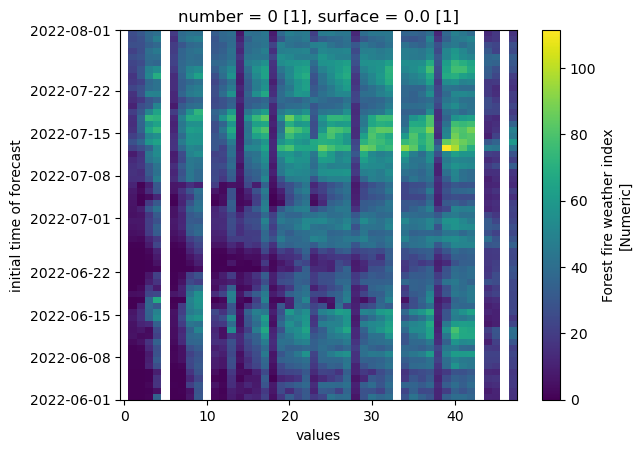

In [158]:
ds.fwinx[0].plot()

TypeError: Dimensions of C (61, 48) are incompatible with X (48) and/or Y (48); see help(pcolormesh)

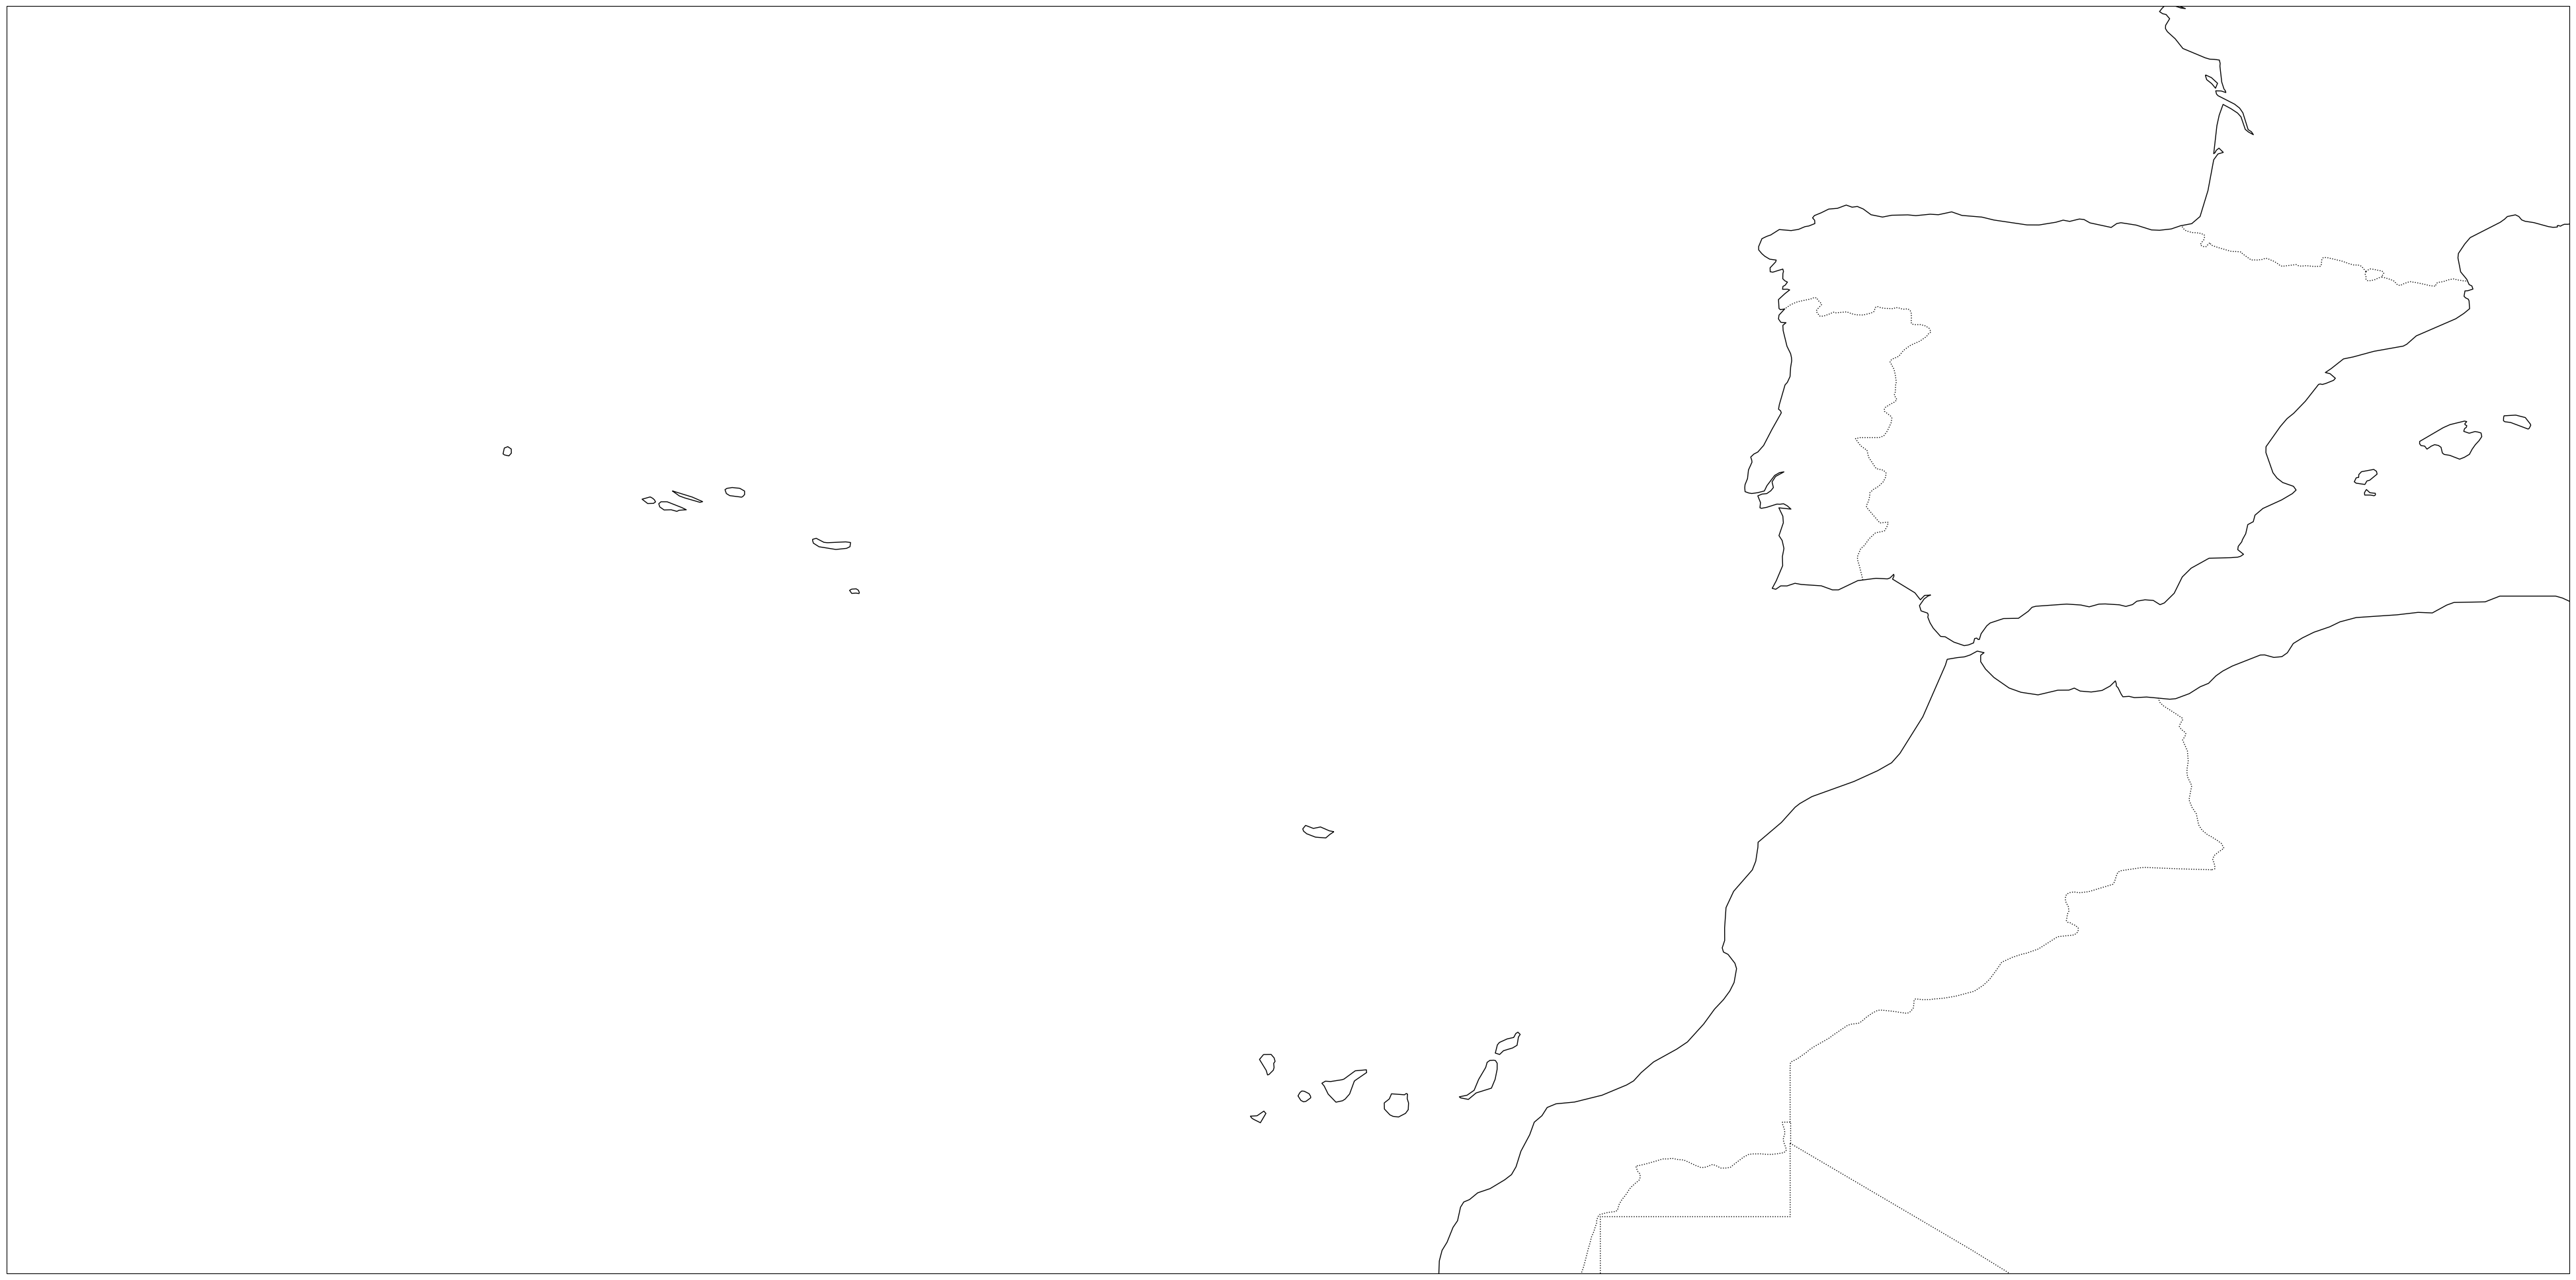

In [171]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract longitudes and latitudes from the dataset
longitudes = ds.longitude.values
latitudes = ds.latitude.values
fwinx = ds.fwinx[0].values

# Create a map centered around the Iberian Peninsula
fig, ax = plt.subplots(figsize=(50, 50), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Set the extent of the map
ax.set_extent([-40, 5, 25, 45])

# Add coastline and borders to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Create 2D arrays for longitudes and latitudes
longitudes_2d, latitudes_2d = np.meshgrid(longitudes, latitudes)

# Now use these 2D arrays in your plot
plt.pcolormesh(longitudes_2d, latitudes_2d, fwinx, transform=ccrs.PlateCarree())

# Save the figure
plt.savefig('map2.png', dpi=300)

# Show the plot
plt.show()

In [169]:
fwinx = ds.fwinx[0].values
print(fwinx)

[[           nan 3.90625140e-03 4.29687500e-02 ... 1.06875000e+01
             nan 1.58710938e+01]
 [           nan 3.90625000e-02 5.85937500e-02 ... 1.11250000e+01
             nan 1.64179688e+01]
 [           nan 1.32812500e-01 3.51562500e-02 ... 1.47734375e+01
             nan 1.84414062e+01]
 ...
 [           nan 2.65898438e+01 2.70117188e+01 ... 2.27500000e+01
             nan 2.66289062e+01]
 [           nan 2.49648438e+01 2.79335938e+01 ... 1.80039062e+01
             nan 1.87656250e+01]
 [           nan 2.60468750e+01 3.03593750e+01 ... 1.81562500e+01
             nan 1.64882812e+01]]


In [142]:
print(ds.data_vars)

Data variables:
    fbupinx   (number, time, values) float32 117kB nan 13.5 16.0 ... nan 251.2
    drtcode   (number, time, values) float32 117kB nan 91.75 113.8 ... nan 846.5
    dufmcode  (number, time, values) float32 117kB nan 8.25 9.75 ... nan 199.8
    ffmcode   (number, time, values) float32 117kB nan 28.29 39.04 ... nan 85.04
    fdsrte    (number, time, values) float32 117kB nan 9.011e-18 ... nan 4.492
    fwinx     (number, time, values) float32 117kB nan 0.003906 ... nan 17.9
    infsinx   (number, time, values) float32 117kB nan 0.003906 ... nan 3.16


In [146]:
print(ds['latitude'])
print(ds['longitude'])

41.840811 351.36

<xarray.DataArray 'latitude' (values: 48)> Size: 384B
array([41.840811, 41.840811, 41.840811, 41.840811, 41.840811, 41.27919 ,
       41.27919 , 41.27919 , 41.27919 , 41.27919 , 40.717569, 40.717569,
       40.717569, 40.717569, 40.155947, 40.155947, 40.155947, 40.155947,
       39.594326, 39.594326, 39.594326, 39.594326, 39.594326, 39.032705,
       39.032705, 39.032705, 39.032705, 39.032705, 38.471083, 38.471083,
       38.471083, 38.471083, 38.471083, 37.909462, 37.909462, 37.909462,
       37.909462, 37.909462, 37.347841, 37.347841, 37.347841, 37.347841,
       37.347841, 36.786219, 36.786219, 36.786219, 36.786219, 36.786219])
Coordinates:
    surface    float64 8B 0.0
    latitude   (values) float64 384B 41.84 41.84 41.84 ... 36.79 36.79 36.79
    longitude  (values) float64 384B 350.6 351.4 352.1 ... 352.0 352.7 353.3
Dimensions without coordinates: values
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude
<xarray.DataArray 'lo

In [231]:
## Este é o mais correcto

# Select the 'fwinx' data variable
fwinx = ds['fwinx']
lat = ds['latitude']
lon = ds['longitude']
tm = ds['time']

#print(tm)
'''
# Index 'fwinx' with the desired time
fwinx_at_time = fwinx.sel(time='2022-06-01T12:00:00.000000000')
print(fwinx_at_time[0][1])

print("Number: ", fwinx_at_time[0][1].coords['number'].values)
print("Time: ", fwinx_at_time[0][1].coords['time'].values)
print("Surface: ", fwinx_at_time[0][1].coords['surface'].values)
print("Latitude: ", fwinx_at_time[0][1].coords['latitude'].values)
print("Longitude: ", fwinx_at_time[0][1].coords['longitude'].values)
'''

'''
lat_values = ds['latitude'].values
lon_values = ds['longitude'].values

# Desired latitude and longitude
desired_lat = 41.840811206489
desired_lon = 351.36

# Find the index of the nearest latitude and longitude
lat_idx = (np.abs(lat_values - desired_lat)).argmin()
lon_idx = (np.abs(lon_values - desired_lon)).argmin()
'''

#print(lat_idx, lon_idx)

# Compute the index in the flattened array
#flat_idx = lat_idx * len(lon_values) + lon_idx

#print(flat_idx)

# Select the 'fwinx' data variable at the specified time and location
#specific_value = fwinx.sel(time='2022-06-01T12:00:00', values=flat_idx, number=0)

# Print the specific value
#print(specific_value)

# Select the data for a given number and time
data = fwinx.sel(time='2022-06-01T12:00:00', number=0)

# Print the values dimension of the resulting DataArray
print("Values: ", len(data.values))
print(data.values)
print(len(data.coords['longitude'].values))

#fwinx_at_time.plot()

# Show the plot
#plt.show()

#ds.close()

# Print the values
#print(fwinx_at_time.values)
#print(lat)
#print(len(lat))
#print(len(fwinx_at_time.values[0]))

Values:  48
[          nan 3.9062514e-03 4.2968750e-02 1.2031250e+00 3.4976562e+01
           nan 7.4218750e-02 3.0859375e-01 6.3789062e+00 3.0445312e+01
           nan 1.7812500e+00 9.3359375e-01 8.7031250e+00 4.5664062e+00
 1.2222656e+01 1.0562500e+01 2.1699219e+01 4.4218750e+00 1.7972656e+01
 3.2390625e+01 2.3765625e+01 3.0949219e+01 1.8578125e+01 2.3078125e+01
 4.2378906e+01 3.7972656e+01 3.9171875e+01 6.4726562e+00 2.8585938e+01
 4.1910156e+01 3.6738281e+01 3.9671875e+01           nan 2.9128906e+01
 4.2429688e+01 3.4175781e+01 2.8855469e+01 1.1656250e+01 3.3261719e+01
 3.9250000e+01 3.9179688e+01 3.6125000e+01           nan 1.1089844e+01
 1.0687500e+01           nan 1.5871094e+01]
48


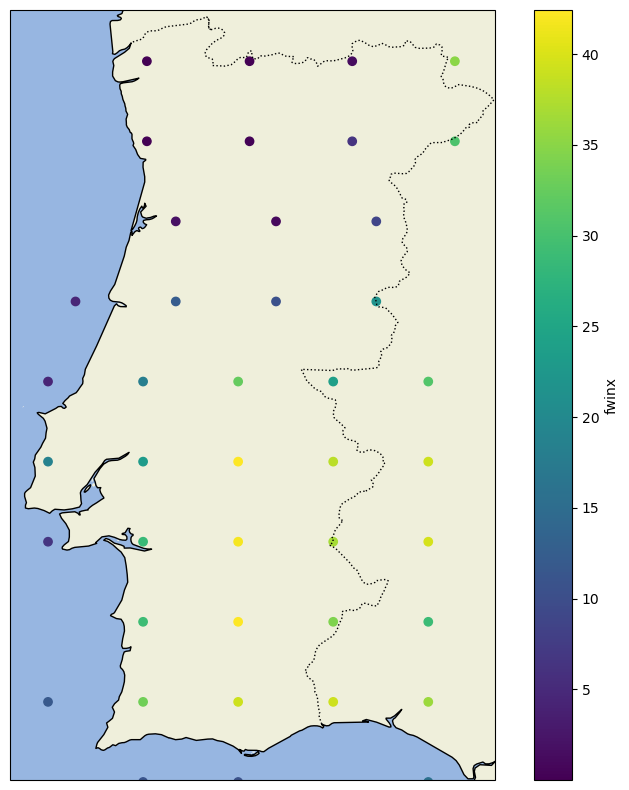

In [233]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude boundaries of Portugal
lat_min, lat_max = 36.8, 42.2
lon_min, lon_max = -9.6, -6.2

# Create a map with cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

lon, lat = np.meshgrid(data.coords['longitude'].values, data.coords['latitude'].values)

# Plot the data
plt.scatter(data.coords['longitude'].values, data.coords['latitude'].values, c=data.values, transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(label='fwinx')

plt.savefig('plot_1.png')

# Show the plot
plt.show()

In [217]:
# Create a mask where fwinx is equal to 0.003906
mask = fwinx == 0.003906

# Apply the mask and drop all NaN values
result = fwinx.where(mask, drop=False)

# Print the unique times in the result
print("Possible times: ", result.coords['latitude'].values)
print("Possible times: ", result.coords['longitude'].values)

Possible times:  [41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]
Possible times:  [350.64       351.36       352.08       352.8        353.52
 350.64       351.36       352.08       352.8        353.52
 350.859375   351.5625     352.265625   352.96875    350.859375
 351.5625     352.265625   352.96875    350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333


In [220]:
desired_lat = 41.84081121
desired_lon = 351.36

# Find the index of the nearest latitude and longitude
lat_idx = (np.abs(lat_values - desired_lat)).argmin()
lon_idx = (np.abs(lon_values - desired_lon)).argmin()

# Compute the index in the flattened array
flat_idx = lat_idx * len(lon_values) + lon_idx

print(flat_idx)

# Compute the lat_idx and lon_idx from the flat_idx
lat_idx = flat_idx // len(lon_values)
lon_idx = flat_idx % len(lon_values)

# Get the corresponding latitude and longitude values
actual_lat = lat_values[lat_idx]
actual_lon = lon_values[lon_idx]

print("Actual Latitude: ", actual_lat)
print("Actual Longitude: ", actual_lon)

# Select the 'fwinx' data variable at the specified location
result = fwinx.sel(values=flat_idx)

print(result)

1
Actual Latitude:  41.840811206489
Actual Longitude:  351.36
<xarray.DataArray 'fwinx' (number: 10, time: 61)> Size: 2kB
array([[3.906251e-03, 3.906250e-02, 1.328125e-01, ..., 2.658984e+01,
        2.496484e+01, 2.604688e+01],
       [1.838109e-09, 9.375000e-02, 4.023438e-01, ..., 2.551172e+01,
        2.532031e+01, 2.490625e+01],
       [1.917786e-09, 3.906250e-02, 3.671875e-01, ..., 2.221484e+01,
        2.458984e+01, 2.353906e+01],
       ...,
       [1.835538e-09, 8.203125e-02, 1.484375e-01, ..., 2.314062e+01,
        2.589062e+01, 2.220312e+01],
       [1.171875e-02, 7.031250e-02, 5.117188e-01, ..., 2.397656e+01,
        2.292578e+01, 2.594531e+01],
       [1.782598e-09, 1.562500e-02, 5.859375e-02, ..., 2.457422e+01,
        2.414844e+01, 2.385156e+01]], dtype=float32)
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B 0.0
    latitude   float64 8B 41.84
    

In [186]:
# Select the 'fwinx' data variable
fwinx = ds['fwinx']

print(fwinx[1])

# Print a specific value from fwinx
specific_value = fwinx.isel(time="2022-06-01T12:00:00", values=)
print("Specific value: ", specific_value.values)

# Get the coordinates that originate the specific value
coords = fwinx.where(fwinx == specific_value.values, drop=True)
print("Coordinates that originate the specific value: ", coords)

ds.close()

<xarray.DataArray 'fwinx' (time: 61, values: 48)> Size: 12kB
array([[         nan, 1.838109e-09, 2.734375e-02, ..., 1.116406e+01,
                 nan, 1.705859e+01],
       [         nan, 9.375000e-02, 4.687500e-02, ..., 1.069531e+01,
                 nan, 1.644922e+01],
       [         nan, 4.023438e-01, 1.171875e-01, ..., 1.463672e+01,
                 nan, 1.781250e+01],
       ...,
       [         nan, 2.551172e+01, 2.591797e+01, ..., 2.154688e+01,
                 nan, 2.469531e+01],
       [         nan, 2.532031e+01, 2.785547e+01, ..., 1.771484e+01,
                 nan, 1.839062e+01],
       [         nan, 2.490625e+01, 2.839453e+01, ..., 1.701172e+01,
                 nan, 1.701172e+01]], dtype=float32)
Coordinates:
    number     int64 8B 1
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B 0.0
    latitude   (values) float64 384B 41.84 41.84 41.84 ... 36.79 36.79 36.79
    longitude  (values) float64 384B 350.6 351.4

In [152]:
# Select the 'fwinx' data variable
fwinx = ds['fwinx']

# Index 'fwinx' with the desired time and value index
fwinx_at_time_and_value = fwinx.sel(time='2022-06-01T12:00:00', values=1)

# Print the value
print(fwinx_at_time_and_value.values)

[3.9062514e-03 1.8381090e-09 1.9177864e-09 1.7916157e-09 7.8125009e-03
 3.9062514e-03 4.2968750e-02 1.8355379e-09 1.1718751e-02 1.7825976e-09]


In [154]:
# Create a new coordinate 'location' that combines 'latitude' and 'longitude'
location = xr.DataArray(
    np.arange(len(ds['values'])), 
    dims='location', 
    coords={'latitude': ('location', ds['latitude'].values), 'longitude': ('location', ds['longitude'].values)}
)

# Create a new Dataset that includes 'location' as a coordinate
new_ds = xr.Dataset({'fwinx': (['time', 'location'], ds['fwinx'].values)}, coords={'time': ds['time'], 'location': location})

# Now you can select data for a specific time and location
fwinx_at_time_and_location = new_ds.sel(time='2022-06-01T12:00:00', latitude=41.840811, longitude=350.64, method='nearest')

ValueError: Variable 'fwinx': Could not convert tuple of form (dims, data[, attrs, encoding]): (['time', 'location'], array([[[           nan, 3.90625140e-03, 4.29687500e-02, ...,
         1.06875000e+01,            nan, 1.58710938e+01],
        [           nan, 3.90625000e-02, 5.85937500e-02, ...,
         1.11250000e+01,            nan, 1.64179688e+01],
        [           nan, 1.32812500e-01, 3.51562500e-02, ...,
         1.47734375e+01,            nan, 1.84414062e+01],
        ...,
        [           nan, 2.65898438e+01, 2.70117188e+01, ...,
         2.27500000e+01,            nan, 2.66289062e+01],
        [           nan, 2.49648438e+01, 2.79335938e+01, ...,
         1.80039062e+01,            nan, 1.87656250e+01],
        [           nan, 2.60468750e+01, 3.03593750e+01, ...,
         1.81562500e+01,            nan, 1.64882812e+01]],

       [[           nan, 1.83810900e-09, 2.73437519e-02, ...,
         1.11640625e+01,            nan, 1.70585938e+01],
        [           nan, 9.37500000e-02, 4.68750000e-02, ...,
         1.06953125e+01,            nan, 1.64492188e+01],
        [           nan, 4.02343750e-01, 1.17187500e-01, ...,
         1.46367188e+01,            nan, 1.78125000e+01],
        ...,
        [           nan, 2.55117188e+01, 2.59179688e+01, ...,
         2.15468750e+01,            nan, 2.46953125e+01],
        [           nan, 2.53203125e+01, 2.78554688e+01, ...,
         1.77148438e+01,            nan, 1.83906250e+01],
        [           nan, 2.49062500e+01, 2.83945312e+01, ...,
         1.70117188e+01,            nan, 1.70117188e+01]],

       [[           nan, 1.91778637e-09, 1.17187500e-01, ...,
         1.20234375e+01,            nan, 1.75625000e+01],
        [           nan, 3.90625000e-02, 5.07812500e-02, ...,
         1.04375000e+01,            nan, 1.68476562e+01],
        [           nan, 3.67187500e-01, 4.29687500e-02, ...,
         1.43867188e+01,            nan, 1.81992188e+01],
        ...,
        [           nan, 2.22148438e+01, 2.41367188e+01, ...,
         2.48164062e+01,            nan, 2.69609375e+01],
        [           nan, 2.45898438e+01, 2.87734375e+01, ...,
         1.83125000e+01,            nan, 1.98085938e+01],
        [           nan, 2.35390625e+01, 2.81562500e+01, ...,
         1.55234375e+01,            nan, 1.60078125e+01]],

       ...,

       [[           nan, 1.83553794e-09, 2.34375019e-02, ...,
         9.24218750e+00,            nan, 1.69179688e+01],
        [           nan, 8.20312500e-02, 1.95312519e-02, ...,
         1.36718750e+01,            nan, 1.68632812e+01],
        [           nan, 1.48437500e-01, 3.90625186e-03, ...,
         1.45312500e+01,            nan, 1.69687500e+01],
        ...,
        [           nan, 2.31406250e+01, 2.74882812e+01, ...,
         2.49804688e+01,            nan, 2.75976562e+01],
        [           nan, 2.58906250e+01, 2.70039062e+01, ...,
         1.80156250e+01,            nan, 1.96250000e+01],
        [           nan, 2.22031250e+01, 2.58437500e+01, ...,
         1.57109375e+01,            nan, 1.70507812e+01]],

       [[           nan, 1.17187509e-02, 3.51562500e-02, ...,
         1.21484375e+01,            nan, 1.67695312e+01],
        [           nan, 7.03125000e-02, 1.95312519e-02, ...,
         9.25781250e+00,            nan, 1.25156250e+01],
        [           nan, 5.11718750e-01, 4.68750000e-02, ...,
         1.57460938e+01,            nan, 1.76875000e+01],
        ...,
        [           nan, 2.39765625e+01, 2.51875000e+01, ...,
         2.31992188e+01,            nan, 2.70703125e+01],
        [           nan, 2.29257812e+01, 2.59453125e+01, ...,
         1.79609375e+01,            nan, 1.80468750e+01],
        [           nan, 2.59453125e+01, 3.12656250e+01, ...,
         1.98046875e+01,            nan, 1.85351562e+01]],

       [[           nan, 1.78259763e-09, 5.85937500e-02, ...,
         1.18789062e+01,            nan, 1.69726562e+01],
        [           nan, 1.56250019e-02, 1.95312519e-02, ...,
         1.23515625e+01,            nan, 1.66718750e+01],
        [           nan, 5.85937500e-02, 1.56250019e-02, ...,
         1.54101562e+01,            nan, 1.77304688e+01],
        ...,
        [           nan, 2.45742188e+01, 2.68632812e+01, ...,
         2.14023438e+01,            nan, 2.57343750e+01],
        [           nan, 2.41484375e+01, 2.89296875e+01, ...,
         1.59375000e+01,            nan, 1.84179688e+01],
        [           nan, 2.38515625e+01, 2.94257812e+01, ...,
         1.76640625e+01,            nan, 1.78984375e+01]]], dtype=float32)) to Variable.

In [155]:
# Create new coordinates 'latitude' and 'longitude'
latitude = xr.DataArray(ds['latitude'].values, dims='location')
longitude = xr.DataArray(ds['longitude'].values, dims='location')

# Create a new Dataset that includes 'latitude' and 'longitude' as coordinates
new_ds = xr.Dataset({'fwinx': (['time', 'location'], ds['fwinx'].values)}, coords={'time': ds['time'], 'location': location, 'latitude': latitude, 'longitude': longitude})

# Now you can select data for a specific time and location
fwinx_at_time_and_location = new_ds['fwinx'].sel(time='2022-06-01T12:00:00', latitude=41.840811, longitude=350.64, method='nearest')

ValueError: Variable 'fwinx': Could not convert tuple of form (dims, data[, attrs, encoding]): (['time', 'location'], array([[[           nan, 3.90625140e-03, 4.29687500e-02, ...,
         1.06875000e+01,            nan, 1.58710938e+01],
        [           nan, 3.90625000e-02, 5.85937500e-02, ...,
         1.11250000e+01,            nan, 1.64179688e+01],
        [           nan, 1.32812500e-01, 3.51562500e-02, ...,
         1.47734375e+01,            nan, 1.84414062e+01],
        ...,
        [           nan, 2.65898438e+01, 2.70117188e+01, ...,
         2.27500000e+01,            nan, 2.66289062e+01],
        [           nan, 2.49648438e+01, 2.79335938e+01, ...,
         1.80039062e+01,            nan, 1.87656250e+01],
        [           nan, 2.60468750e+01, 3.03593750e+01, ...,
         1.81562500e+01,            nan, 1.64882812e+01]],

       [[           nan, 1.83810900e-09, 2.73437519e-02, ...,
         1.11640625e+01,            nan, 1.70585938e+01],
        [           nan, 9.37500000e-02, 4.68750000e-02, ...,
         1.06953125e+01,            nan, 1.64492188e+01],
        [           nan, 4.02343750e-01, 1.17187500e-01, ...,
         1.46367188e+01,            nan, 1.78125000e+01],
        ...,
        [           nan, 2.55117188e+01, 2.59179688e+01, ...,
         2.15468750e+01,            nan, 2.46953125e+01],
        [           nan, 2.53203125e+01, 2.78554688e+01, ...,
         1.77148438e+01,            nan, 1.83906250e+01],
        [           nan, 2.49062500e+01, 2.83945312e+01, ...,
         1.70117188e+01,            nan, 1.70117188e+01]],

       [[           nan, 1.91778637e-09, 1.17187500e-01, ...,
         1.20234375e+01,            nan, 1.75625000e+01],
        [           nan, 3.90625000e-02, 5.07812500e-02, ...,
         1.04375000e+01,            nan, 1.68476562e+01],
        [           nan, 3.67187500e-01, 4.29687500e-02, ...,
         1.43867188e+01,            nan, 1.81992188e+01],
        ...,
        [           nan, 2.22148438e+01, 2.41367188e+01, ...,
         2.48164062e+01,            nan, 2.69609375e+01],
        [           nan, 2.45898438e+01, 2.87734375e+01, ...,
         1.83125000e+01,            nan, 1.98085938e+01],
        [           nan, 2.35390625e+01, 2.81562500e+01, ...,
         1.55234375e+01,            nan, 1.60078125e+01]],

       ...,

       [[           nan, 1.83553794e-09, 2.34375019e-02, ...,
         9.24218750e+00,            nan, 1.69179688e+01],
        [           nan, 8.20312500e-02, 1.95312519e-02, ...,
         1.36718750e+01,            nan, 1.68632812e+01],
        [           nan, 1.48437500e-01, 3.90625186e-03, ...,
         1.45312500e+01,            nan, 1.69687500e+01],
        ...,
        [           nan, 2.31406250e+01, 2.74882812e+01, ...,
         2.49804688e+01,            nan, 2.75976562e+01],
        [           nan, 2.58906250e+01, 2.70039062e+01, ...,
         1.80156250e+01,            nan, 1.96250000e+01],
        [           nan, 2.22031250e+01, 2.58437500e+01, ...,
         1.57109375e+01,            nan, 1.70507812e+01]],

       [[           nan, 1.17187509e-02, 3.51562500e-02, ...,
         1.21484375e+01,            nan, 1.67695312e+01],
        [           nan, 7.03125000e-02, 1.95312519e-02, ...,
         9.25781250e+00,            nan, 1.25156250e+01],
        [           nan, 5.11718750e-01, 4.68750000e-02, ...,
         1.57460938e+01,            nan, 1.76875000e+01],
        ...,
        [           nan, 2.39765625e+01, 2.51875000e+01, ...,
         2.31992188e+01,            nan, 2.70703125e+01],
        [           nan, 2.29257812e+01, 2.59453125e+01, ...,
         1.79609375e+01,            nan, 1.80468750e+01],
        [           nan, 2.59453125e+01, 3.12656250e+01, ...,
         1.98046875e+01,            nan, 1.85351562e+01]],

       [[           nan, 1.78259763e-09, 5.85937500e-02, ...,
         1.18789062e+01,            nan, 1.69726562e+01],
        [           nan, 1.56250019e-02, 1.95312519e-02, ...,
         1.23515625e+01,            nan, 1.66718750e+01],
        [           nan, 5.85937500e-02, 1.56250019e-02, ...,
         1.54101562e+01,            nan, 1.77304688e+01],
        ...,
        [           nan, 2.45742188e+01, 2.68632812e+01, ...,
         2.14023438e+01,            nan, 2.57343750e+01],
        [           nan, 2.41484375e+01, 2.89296875e+01, ...,
         1.59375000e+01,            nan, 1.84179688e+01],
        [           nan, 2.38515625e+01, 2.94257812e+01, ...,
         1.76640625e+01,            nan, 1.78984375e+01]]], dtype=float32)) to Variable.

In [149]:
# Select the 'fwinx' data variable at the desired time
fwinx_at_time = ds['fwinx'].sel(time='2022-06-01T12:00:00')

# Get the 'latitude' coordinate
latitudes = fwinx_at_time.latitude
longitudes = fwinx_at_time.longitude

# Print the latitudes
print(latitudes.values)
print(longitudes.values)

[41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]
[350.64       351.36       352.08       352.8        353.52
 350.64       351.36       352.08       352.8        353.52
 350.859375   351.5625     352.265625   352.96875    350.859375
 351.5625     352.265625   352.96875    350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.333

In [141]:
# If the time variable is separate, merge it into the data variables
for var in ds.data_vars:
    if 'time' in ds[var].dims:
        ds[var] = ds[var].assign_coords(time=ds['time'])

# Convert the Dataset to a DataFrame
df = ds.to_dataframe()

# Save the DataFrame as a CSV file
df.to_csv('teste.csv', index=False)

In [104]:
latitudes = ds.latitude.data
print(latitudes)
print(ds.longitude.data)


#ds['longitude'] = (ds.longitude + 180) % 360 - 180
#longitudes = ds.longitude.values

#print(f"Latitude: {latitudes[0]}")
#print(len(latitudes))
#print(len(longitudes))
#print(f"Longitude: {longitudes[0]}")

[41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]
[350.64       351.36       352.08       352.8        353.52
 350.64       351.36       352.08       352.8        353.52
 350.859375   351.5625     352.265625   352.96875    350.859375
 351.5625     352.265625   352.96875    350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.333

In [64]:
ds['longitude'] = (ds.longitude + 360) % 360
longitudes = ds.longitude.values
print(longitudes)

[350.64       351.36       352.08       352.8        353.52
 350.64       351.36       352.08       352.8        353.52
 350.859375   351.5625     352.265625   352.96875    350.859375
 351.5625     352.265625   352.96875    350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333 350.66666667 351.33333333
 352.         352.66666667 353.33333333]


In [46]:
# Caso o número de latitude e longitude seja diferent
novas_lat = []
novas_lon = []
for lat in range(len(latitudes)):
    for lon in range(len(longitudes)):
        novas_lat.append(latitudes[lat])
        novas_lon.append(longitudes[lon])

In [47]:
print(len(novas_lat))
print(len(novas_lon))

84
84


In [41]:
data = ds.time.values
print(data)

['2022-06-01T12:00:00.000000000' '2022-06-02T12:00:00.000000000'
 '2022-06-03T12:00:00.000000000' '2022-06-04T12:00:00.000000000'
 '2022-06-05T12:00:00.000000000' '2022-06-06T12:00:00.000000000'
 '2022-06-07T12:00:00.000000000' '2022-06-08T12:00:00.000000000'
 '2022-06-09T12:00:00.000000000' '2022-06-10T12:00:00.000000000'
 '2022-06-11T12:00:00.000000000' '2022-06-12T12:00:00.000000000'
 '2022-06-13T12:00:00.000000000' '2022-06-14T12:00:00.000000000'
 '2022-06-15T12:00:00.000000000' '2022-06-16T12:00:00.000000000'
 '2022-06-17T12:00:00.000000000' '2022-06-18T12:00:00.000000000'
 '2022-06-19T12:00:00.000000000' '2022-06-20T12:00:00.000000000'
 '2022-06-21T12:00:00.000000000' '2022-06-22T12:00:00.000000000'
 '2022-06-23T12:00:00.000000000' '2022-06-24T12:00:00.000000000'
 '2022-06-25T12:00:00.000000000' '2022-06-26T12:00:00.000000000'
 '2022-06-27T12:00:00.000000000' '2022-06-28T12:00:00.000000000'
 '2022-06-29T12:00:00.000000000' '2022-06-30T12:00:00.000000000'
 '2022-07-01T12:00:00.000

In [100]:
import math
def DistanceTwoPoints(lat1, lon1, lat2, lon2):
    R = 6371e3  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

def count_decimal_places(number):
    str_num = str(number)
    if '.' in str_num:
        return len(str_num) - str_num.index('.') - 1
    else:
        return 0

def find_nearest(lat, lon, latitudes, longitudes):
    min_distance = None
    nearest_point = None

    for lat2, lon2 in zip(latitudes, longitudes):
        distance = DistanceTwoPoints(lat, lon, lat2, lon2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            nearest_point = (lat2, lon2)

    return min_distance, nearest_point

In [101]:
#40.20875,-7.36260499954224
#40.1394270001517,-7.50764199998644
LATITUDE_SING = 40.1394270001517
LONGITUDE_SING = -7.50764199998644


min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, latitudes, longitudes)
#min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, novas_lat, novas_lon)

In [102]:
print(min_distance, nearest_point)

19358.687941512955 (40.15594741204222, 352.265625)


In [105]:
print(min_distance, round(nearest_point[0], 8))

19358.687941512955 40.15594741


In [71]:
longitude360 = (nearest_point[1] + 360) % 360
print(longitude360)

352.265625


In [107]:
# Assuming 'values' is the dimension for both 'latitude' and 'longitude'
ds = ds.assign_coords({"latitude": ("values", ds.latitude.data), "longitude": ("values", ds.longitude.data)})

# Now you can use .sel to select data by 'latitude' and 'longitude'
dufmcode_data = ds['dufmcode'].sel(latitude=round(nearest_point[0], 8), longitude=nearest_point[1])
print(dufmcode_data)

KeyError: "no index found for coordinate 'latitude'"

In [108]:
print(ds.latitude.data)
print(round(nearest_point[0], 8))

[41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]
40.15594741


In [109]:
print(ds.dims)
print(ds.coords)

FrozenMappingWarningOnValuesAccess({'number': 10, 'time': 61, 'values': 48})
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B ...
    latitude   (values) float64 384B 41.84 41.84 41.84 ... 36.79 36.79 36.79
    longitude  (values) float64 384B 350.6 351.4 352.1 ... 352.0 352.7 353.3


In [110]:
# Select the 'values' where both 'latitude' and 'longitude' match the nearest point
dufmcode_data = ds['dufmcode'].sel(values=(ds.latitude == round(nearest_point[0], 8)) & (ds.longitude == nearest_point[1]))
print(dufmcode_data)

<xarray.DataArray 'dufmcode' (number: 10, time: 61, values: 0)> Size: 0B
[0 values with dtype=float32]
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B ...
    latitude   (values) float64 0B 
    longitude  (values) float64 0B 
Dimensions without coordinates: values
Attributes: (12/20)
    GRIB_paramId:                    260542
    GRIB_dataType:                   fc
    GRIB_numberOfPoints:             48
    GRIB_typeOfLevel:                surface
    GRIB_stepType:                   instant
    GRIB_gridType:                   reduced_gg
    ...                              ...
    GRIB_shortName:                  dufmcode
    GRIB_totalNumber:                10
    GRIB_units:                      Numeric
    long_name:                       Duff moisture code
    units:                           Numeric
    standard_name:                   unknown


In [129]:
# Print the unique latitude and longitude values

my_latitude = float(round(nearest_point[0], 8))
my_longitude = float(round(nearest_point[1]))

print(my_latitude, my_longitude)

print(ds.latitude.values)

#print((ds.latitude == my_latitude))

tolerance = 1e-8  # Adjust this value as needed
print((abs(ds.latitude - my_latitude) < tolerance))


print(ds.longitude.values)
print((abs(ds.longitude - my_longitude) < tolerance))

'''
# Try filtering data without rounding the latitude
filtered_data = ds['dufmcode'].where((ds.latitude == nearest_point[0]) & (ds.longitude == nearest_point[1]))
filtered_data = filtered_data.dropna(dim='values')
print(filtered_data)

# Check if the specific 'time' and 'number' exist in the filtered data
print('2022-06-01T12:00:00' in filtered_data.time.values)
print(3 in filtered_data.number.values)
'''

40.15594741 352.0
[41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]
<xarray.DataArray 'latitude' (values: 48)> Size: 48B
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, Fa

"\n# Try filtering data without rounding the latitude\nfiltered_data = ds['dufmcode'].where((ds.latitude == nearest_point[0]) & (ds.longitude == nearest_point[1]))\nfiltered_data = filtered_data.dropna(dim='values')\nprint(filtered_data)\n\n# Check if the specific 'time' and 'number' exist in the filtered data\nprint('2022-06-01T12:00:00' in filtered_data.time.values)\nprint(3 in filtered_data.number.values)\n"

In [135]:
import numpy as np
# Create a range of acceptable latitudes and longitudes
latitude_range = np.arange(my_latitude - tolerance, my_latitude + tolerance, 0.01)
longitude_range = np.arange(my_longitude - tolerance, my_longitude + tolerance, 0.01)
<xarray.DataArray 'dufmcode' (number: 10, time: 61, values: 0)> Size: 0B
array([], shape=(10, 61, 0), dtype=float32)
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B 0.0
    latitude   (values) float64 0B 
    longitude  (values) float64 0B 
Dimensions without coordinates: values
Attributes: (12/20)
    GRIB_paramId:                    260542
    GRIB_dataType:                   fc
    GRIB_numberOfPoints:             48
    GRIB_typeOfLevel:                surface
    GRIB_stepType:                   instant
    GRIB_gridType:                   reduced_gg
    ...                              ...
    GRIB_shortName:                  dufmcode
    GRIB_totalNumber:                10
    GRIB_units:                      Numeric
    long_name:                       Duff moisture code
    units:                           Numeric
    standard_name:                   unknown
# Create masks for latitude and longitude
latitude_mask = ds['dufmcode'].latitude.isin(latitude_range)
longitude_mask = ds['dufmcode'].longitude.isin(longitude_range)

# Use the masks to filter the data
filtered_data = ds['dufmcode'].where(latitude_mask & longitude_mask)

# Drop the NaN values
filtered_data = filtered_data.dropna(dim='values')

# Print the filtered data
print(filtered_data)

<xarray.DataArray 'dufmcode' (number: 10, time: 61, values: 0)> Size: 0B
array([], shape=(10, 61, 0), dtype=float32)
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B 0.0
    latitude   (values) float64 0B 
    longitude  (values) float64 0B 
Dimensions without coordinates: values
Attributes: (12/20)
    GRIB_paramId:                    260542
    GRIB_dataType:                   fc
    GRIB_numberOfPoints:             48
    GRIB_typeOfLevel:                surface
    GRIB_stepType:                   instant
    GRIB_gridType:                   reduced_gg
    ...                              ...
    GRIB_shortName:                  dufmcode
    GRIB_totalNumber:                10
    GRIB_units:                      Numeric
    long_name:                       Duff moisture code
    units:                           Numeric
    standard_name:                   un

In [134]:
# Print the data for the specified time and number
print(ds['dufmcode'].sel(time=my_time, number=my_number))

# Print the 'dufmcode' data array without any filtering or indexing
print(ds['dufmcode'])

<xarray.DataArray 'dufmcode' (values: 48)> Size: 192B
array([   nan,   8.25,   9.75,  28.75,  99.25,    nan,  13.75,  29.25,  84.5 ,
       119.  ,    nan,  46.5 ,  56.  ,  94.75,  19.25, 100.75, 101.75, 160.25,
        18.25,  99.25, 167.  , 170.25, 193.25,  67.25, 123.  , 176.5 , 169.25,
       214.  ,  29.5 , 159.25, 169.5 , 171.  , 182.25,    nan, 147.5 , 169.  ,
       164.75, 153.  ,  47.75, 149.25, 190.75, 180.25, 182.5 ,    nan,  47.  ,
        55.5 ,    nan,  73.25], dtype=float32)
Coordinates:
    number     int64 8B 0
    time       datetime64[ns] 8B 2022-06-01T12:00:00
    surface    float64 8B ...
    latitude   (values) float64 384B 41.84 41.84 41.84 ... 36.79 36.79 36.79
    longitude  (values) float64 384B 350.6 351.4 352.1 ... 352.0 352.7 353.3
Dimensions without coordinates: values
Attributes: (12/20)
    GRIB_paramId:                    260542
    GRIB_dataType:                   fc
    GRIB_numberOfPoints:             48
    GRIB_typeOfLevel:                surface


In [131]:
# Check the range of latitude and longitude
print(ds.latitude.min(), ds.latitude.max())
print(ds.longitude.min(), ds.longitude.max())

# Check for missing values
print(ds.latitude.isnull().any())
print(ds.longitude.isnull().any())

<xarray.DataArray 'latitude' ()> Size: 8B
array(36.78621932)
Coordinates:
    surface  float64 8B ... <xarray.DataArray 'latitude' ()> Size: 8B
array(41.84081121)
Coordinates:
    surface  float64 8B ...
<xarray.DataArray 'longitude' ()> Size: 8B
array(350.64)
Coordinates:
    surface  float64 8B ... <xarray.DataArray 'longitude' ()> Size: 8B
array(353.52)
Coordinates:
    surface  float64 8B ...
<xarray.DataArray 'latitude' ()> Size: 1B
array(False)
Coordinates:
    surface  float64 8B ...
<xarray.DataArray 'longitude' ()> Size: 1B
array(False)
Coordinates:
    surface  float64 8B ...


In [117]:
import numpy as np
print(np.unique(ds['fwinx'].values))

[  0.75   1.     1.25 ... 595.75 596.      nan]


In [118]:
# Print all values of 'dufmcode'
print(ds['fwinx'].values)

[[[           nan 3.90625140e-03 4.29687500e-02 ... 1.06875000e+01
              nan 1.58710938e+01]
  [           nan 3.90625000e-02 5.85937500e-02 ... 1.11250000e+01
              nan 1.64179688e+01]
  [           nan 1.32812500e-01 3.51562500e-02 ... 1.47734375e+01
              nan 1.84414062e+01]
  ...
  [           nan 2.65898438e+01 2.70117188e+01 ... 2.27500000e+01
              nan 2.66289062e+01]
  [           nan 2.49648438e+01 2.79335938e+01 ... 1.80039062e+01
              nan 1.87656250e+01]
  [           nan 2.60468750e+01 3.03593750e+01 ... 1.81562500e+01
              nan 1.64882812e+01]]

 [[           nan 1.83810900e-09 2.73437519e-02 ... 1.11640625e+01
              nan 1.70585938e+01]
  [           nan 9.37500000e-02 4.68750000e-02 ... 1.06953125e+01
              nan 1.64492188e+01]
  [           nan 4.02343750e-01 1.17187500e-01 ... 1.46367188e+01
              nan 1.78125000e+01]
  ...
  [           nan 2.55117188e+01 2.59179688e+01 ... 2.15468750e+01
          

In [67]:
print(ds.latitude.data)

[41.84081121 41.84081121 41.84081121 41.84081121 41.84081121 41.27918996
 41.27918996 41.27918996 41.27918996 41.27918996 40.7175687  40.7175687
 40.7175687  40.7175687  40.15594741 40.15594741 40.15594741 40.15594741
 39.59432611 39.59432611 39.59432611 39.59432611 39.59432611 39.03270478
 39.03270478 39.03270478 39.03270478 39.03270478 38.47108344 38.47108344
 38.47108344 38.47108344 38.47108344 37.90946208 37.90946208 37.90946208
 37.90946208 37.90946208 37.34784071 37.34784071 37.34784071 37.34784071
 37.34784071 36.78621932 36.78621932 36.78621932 36.78621932 36.78621932]


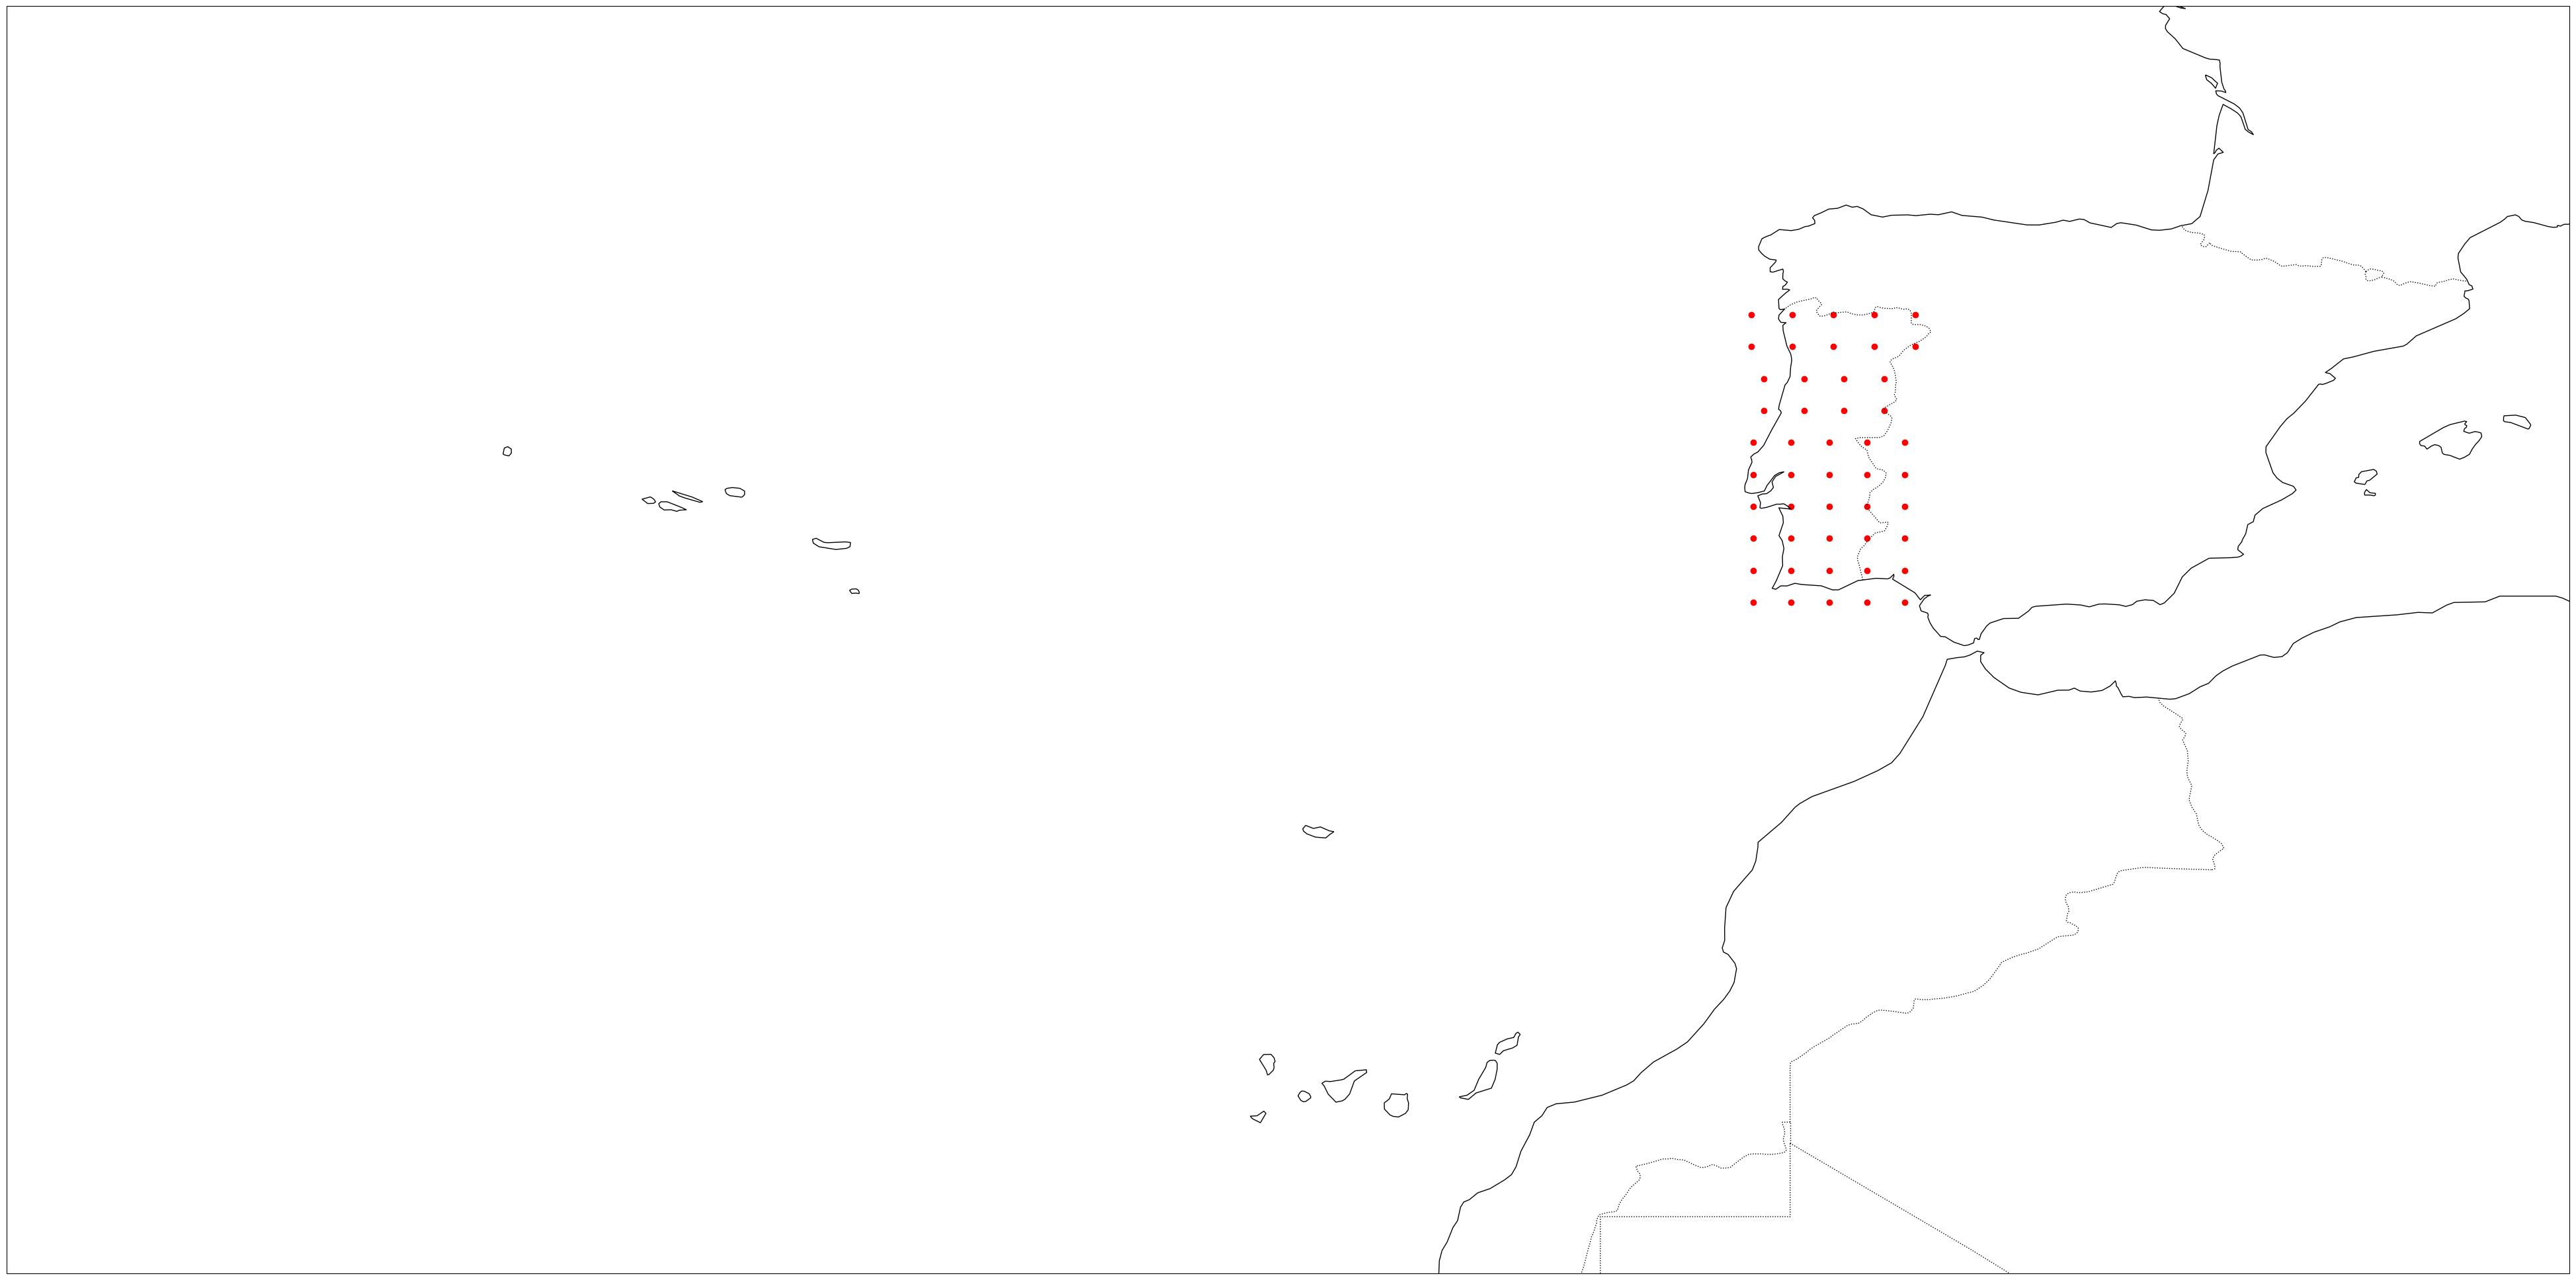

In [55]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map centered around the Iberian Peninsula
fig, ax = plt.subplots(figsize=(50, 50), subplot_kw=dict(projection=ccrs.PlateCarree()))

#[longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([-40, 5, 25, 45])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points on the map
#plt.scatter(novas_lon, novas_lat, color='red', transform=ccrs.PlateCarree())
plt.scatter(longitudes, latitudes, color='red', transform=ccrs.PlateCarree())

plt.savefig('map2.png', dpi=300)

plt.show()